# Credit EDA Case Study

# Introduction

• This case study aims to give you an idea of applying EDA in a real 
business scenario. In this case study, apart from applying the 
techniques that you have learnt in the EDA module, you will also 
develop a basic understanding of risk analytics in banking and 
financial services and understand how data is used to minimize the 
risk of losing money while lending to customers.

## Business Understanding - 1

• The loan providing companies find it hard to give loans to the people due to their 
insufficient or non-existent credit history. Because of that, some consumers use it as 
their advantage by becoming a defaulter. Suppose you work for a consumer finance 
company which specialises in lending various types of loans to urban customers. You 
have to use EDA to analyse the patterns present in the data. This will ensure that the 
applicants capable of repaying the loan are not rejected.
• When the company receives a loan application, the company has to decide for loan 
approval based on the applicant’s profile. Two types of risks are associated with the 
bank’s decision:
• If the applicant is likely to repay the loan, then not approving the loan results in a loss of 
business to the company
• If the applicant is not likely to repay the loan, i.e., he/she is likely to default, then 
approving the loan may lead to a financial loss for the company.

## Business Understanding - 2

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of 
scenarios:
• The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the 
loan in our sample,
• All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
1. Approved: The Company has approved loan Application
2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan 
or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4. Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
Business Objectives
• This case study aims to identify patterns which indicate if a client has difficulty 
paying their installments which may be used for taking actions such as denying 
the loan, reducing the amount of loan, lending (to risky applicants) at a higher 
interest rate, etc. This will ensure that the consumers capable of repaying the 
loan are not rejected. Identification of such applicants using EDA is the aim of 
this case study.
• In other words, the company wants to understand the driving factors (or driver 
variables) behind loan default, i.e., the variables which are strong indicators of 
default. The company can utilize this knowledge for its portfolio and risk 
assessment.
• To develop your understanding of the domain, you are advised to independently 
research a little about risk analytics - understanding the types of variables and 
their significance should be enough).
## Data Understanding
• This dataset has 3 files as explained below:
• 1. 'application_data.csv' contains all the information of the client at the 
time of application.
The data is about whether a client has payment difficulties.
• 2. 'previous_application.csv' contains information about the client’s 
previous loan data. It contains the data whether the previous application 
had been Approved, Cancelled, Refused or Unused offer.
• 3. 'columns_description.csv' is data dictionary which describes the 
meaning of the variables.

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pd.set_option("display.max_columns",None)

### Reading application dataset

In [4]:
df = pd.read_csv("C:\\Users\\OWNER\\Downloads\\application_data.csv")

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.shape

(307511, 122)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### checking null_values in df

In [10]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### checking percentage of null_values in df

In [11]:
null_percent = df.isna().sum()/len(df)*100

In [12]:
null_percent

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

### droping columns which have more than 50% null_values

In [13]:
# checking and creating a list of columns with more than 50% null_values as they are not that much usefull.
col_to_drop = list(df.columns[df.isnull().sum()/len(df)*100 > 50])

In [14]:
len(col_to_drop)

41

In [15]:
#droping the columns which has more than 50% null_values using drop() function.
df = df.drop(col_to_drop,axis=1)

In [16]:
df.shape

(307511, 81)

### finding 5 columns which are having null_value percentage < 13%

In [17]:
top_5_cols = null_percent[null_percent<13]

In [18]:
top_5_cols.head()

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64

### Description of imputation of null_values.

imputation of null_values can be done by relacing null_values by mean or median or mode of the respective column.

imputation strategy :- if the datatype of the column is numerical then it can be imputed by mean or median.
                       median is preferd because it will not affect all other values in the column.
                       
if the datatype of the column is catagorical then it can be imputed by mode of the respective column. 

### checking datatype of each column in df

In [19]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [20]:
df.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

### Treating anomalies of datatypes in df

In [21]:
# DAYS_BIRTH column has negative values we need to convert the values into positive integer by abs() function.

In [22]:
df.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [23]:
# DAYS_BIRTH column is days it need to coverted into years by dividing the column by 365. and converted into floor division.

In [24]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()//365

In [25]:
df['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [26]:
# DAYS_EMPLOYED column has negative values we need to convert the values into positive integer by abs() function.
# DAYS_BDAYS_EMPLOYED column is in days format it need to coverted into years format by dividing the column by 365. 
#and converted into floor division.

In [27]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()//365

In [28]:
df['DAYS_EMPLOYED']

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [29]:
# DAYS_REGISTRATION column has negative values we need to convert the values into positive integer by abs() function.
# DAYS_REGISTRATION column is in days format it need to coverted into years format by dividing the column by 365. 
#and converted into floor division.

In [30]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs()//365

In [31]:
df['DAYS_REGISTRATION']

0          9.0
1          3.0
2         11.0
3         26.0
4         11.0
          ... 
307506    23.0
307507    12.0
307508    18.0
307509     7.0
307510    14.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [32]:
# DAYS_ID_PUBLISH column has negative values we need to convert the values into positive integer by abs() function.
# DAYS_ID_PUBLISH column is in days format it need to coverted into years format by dividing the column by 365. 
#and converted into floor division.

In [33]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs()//365

In [34]:
df['DAYS_ID_PUBLISH']

0          5
1          0
2          6
3          6
4          9
          ..
307506     5
307507    11
307508    14
307509     2
307510     1
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

### Differntiating catagorical columns and numerical columns.

In [35]:
numerical_Cols = df.select_dtypes("number").columns
catagory_Cols = df.select_dtypes("object").columns
numerical_Cols= list(set(numerical_Cols))
catagory_Cols= list(set(catagory_Cols))

In [36]:
numerical_Cols

['AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_17',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'FLOORSMAX_AVG',
 'FLAG_DOCUMENT_2',
 'DAYS_EMPLOYED',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_11',
 'DAYS_ID_PUBLISH',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_7',
 'REG_REGION_NOT_WORK_REGION',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_13',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_3',
 'FLOORSMAX_MEDI',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_DOCUMENT_16',
 'FLOORSMAX_MODE',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_18',
 'EXT_SOURCE_3',
 'FLAG_WORK_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_10',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLAG_DOCUMENT_5',
 'FLAG_EMP_PHONE',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_PHONE',
 'FLAG_CONT_MOBILE',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CIT

In [37]:
catagory_Cols

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

### Identification of outliers

In [38]:
# To identify presence of outliers in different columns we can visualize the respective columns by using boxplot, scatterplot,
# or IQR method.

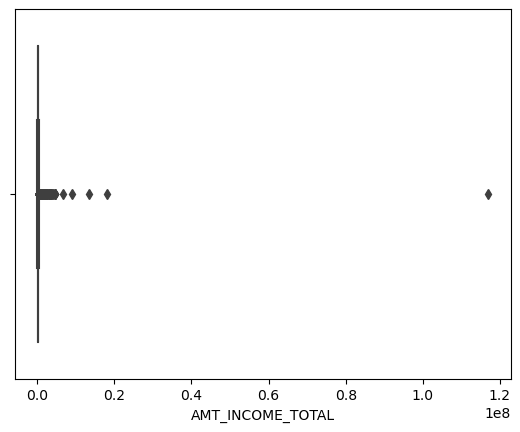

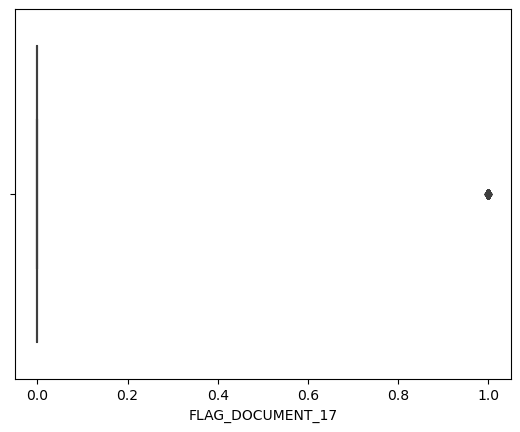

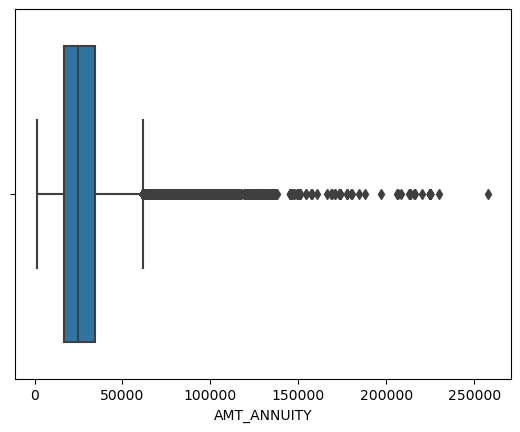

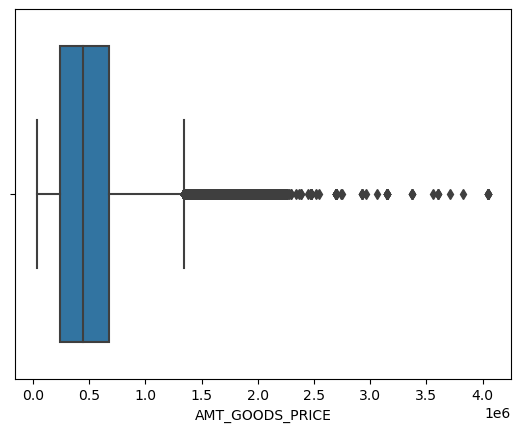

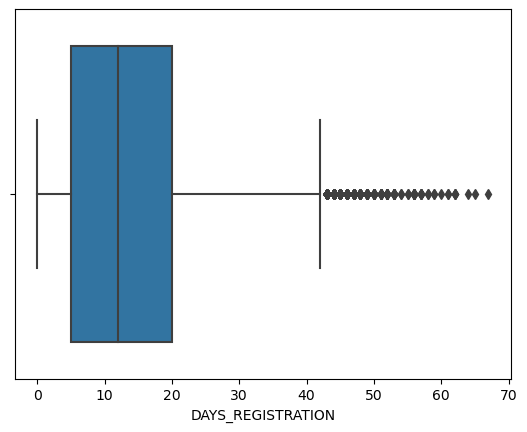

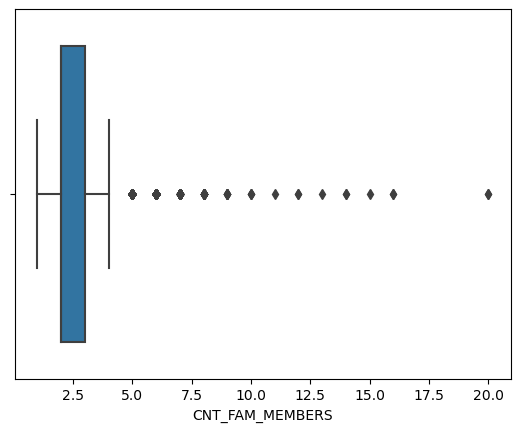

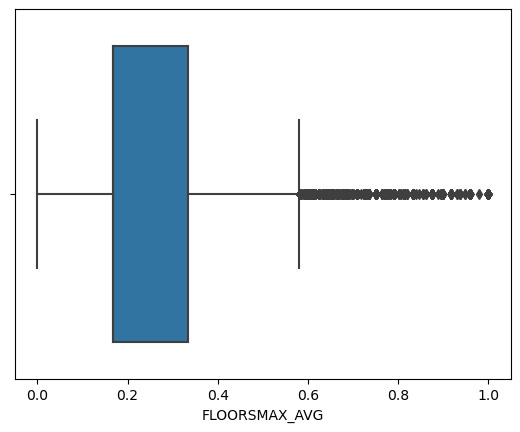

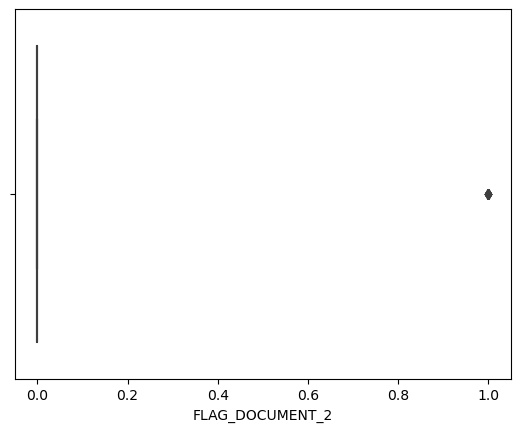

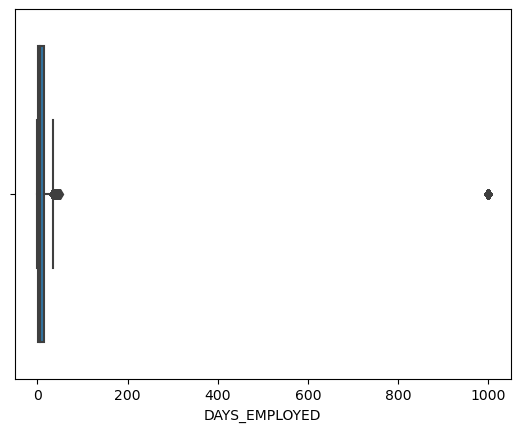

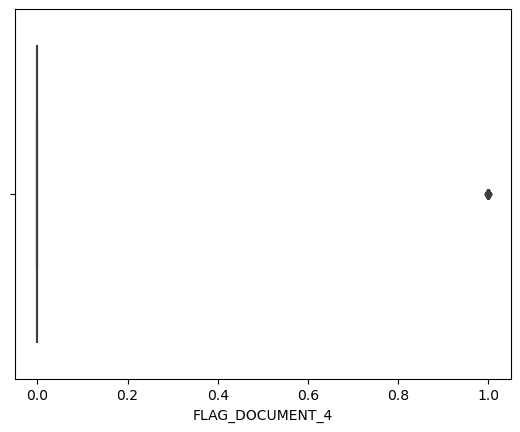

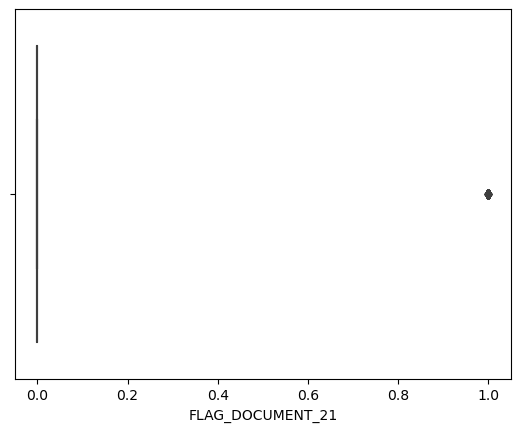

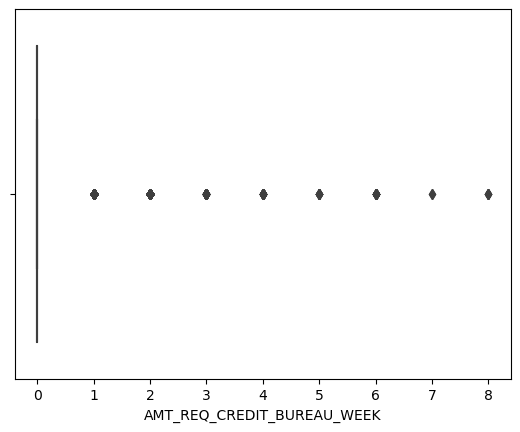

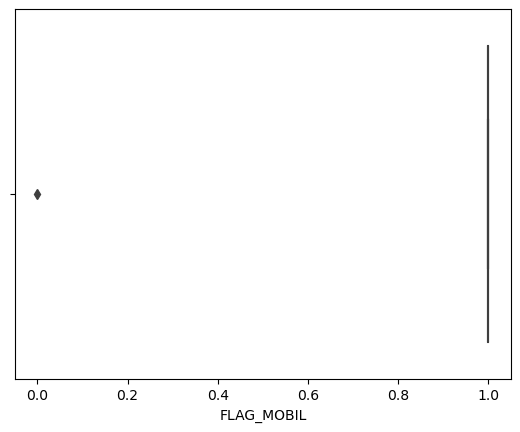

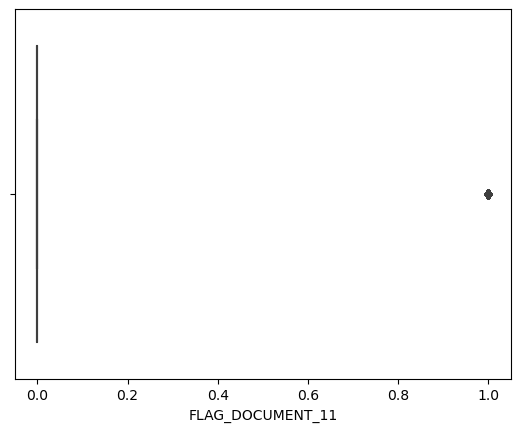

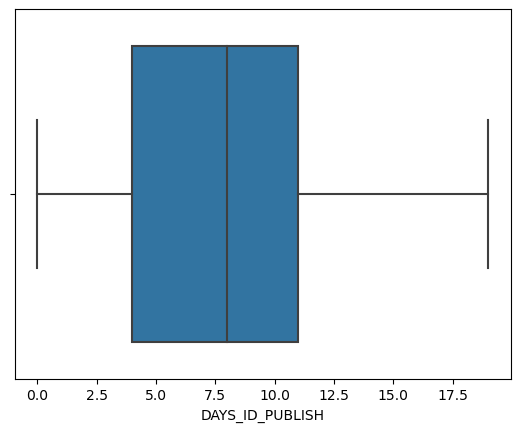

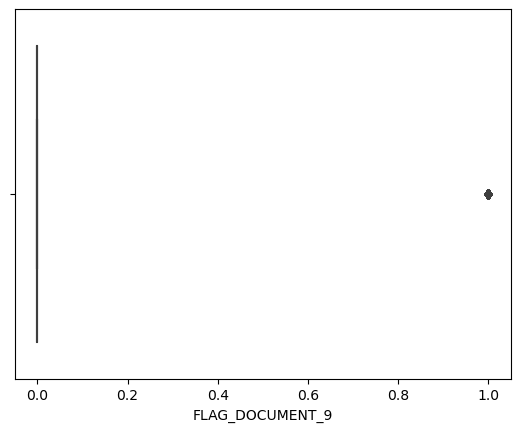

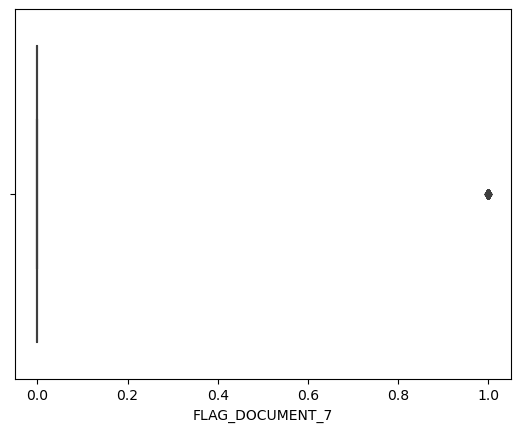

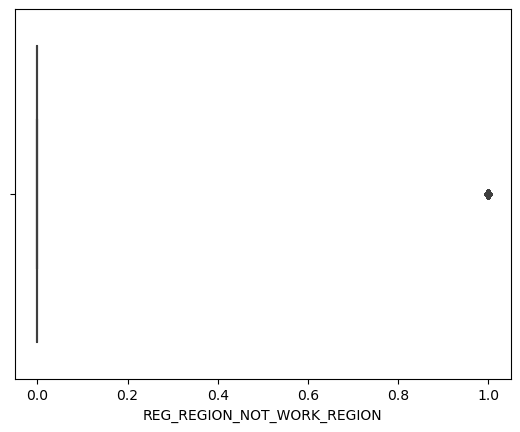

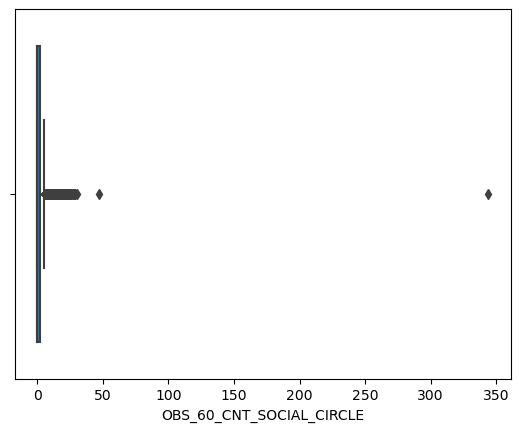

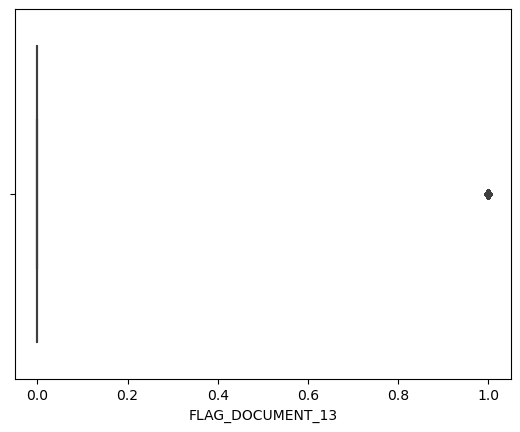

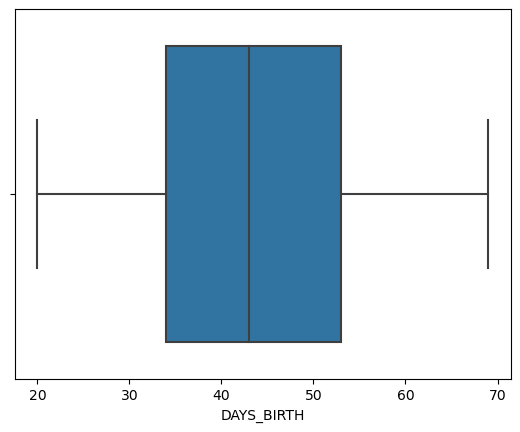

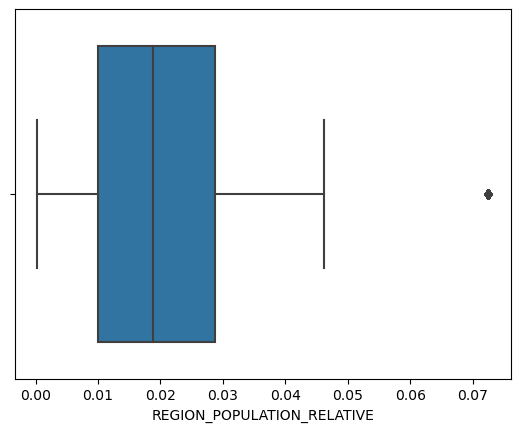

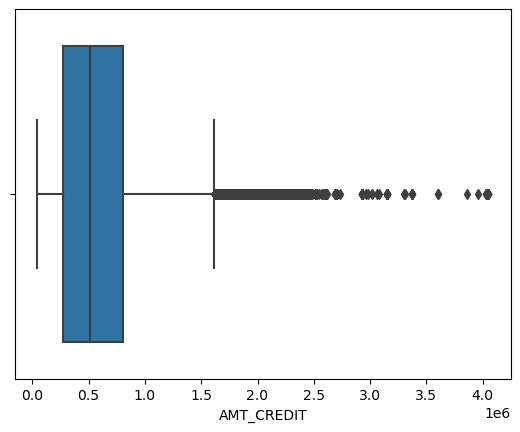

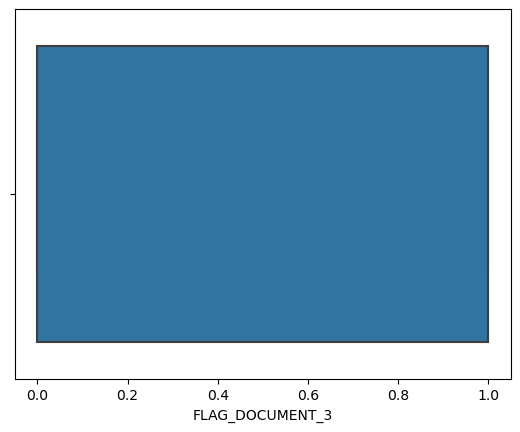

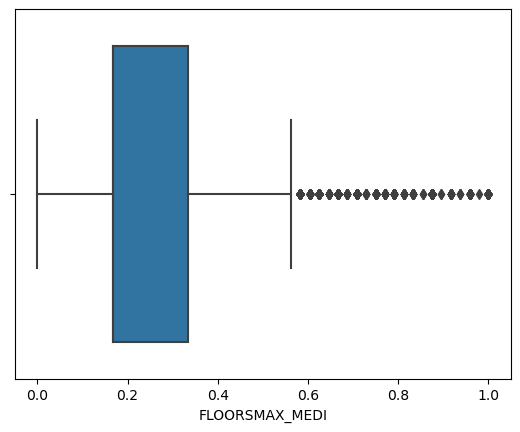

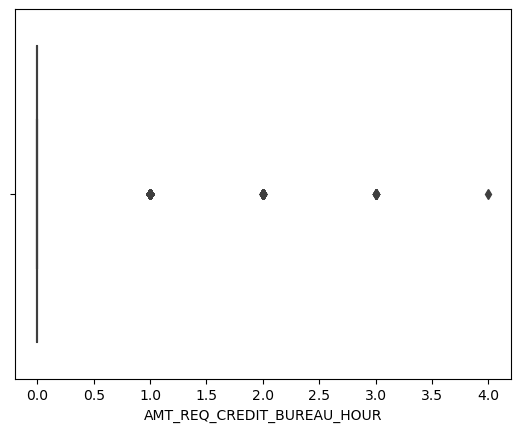

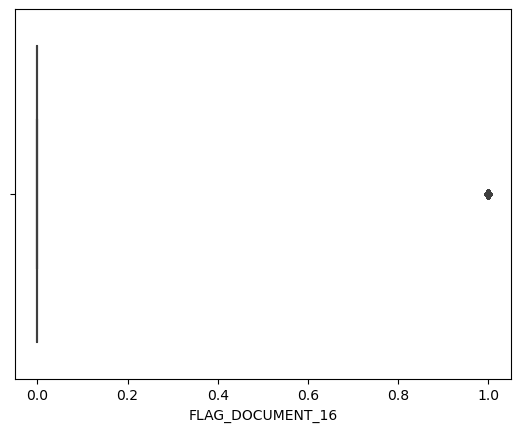

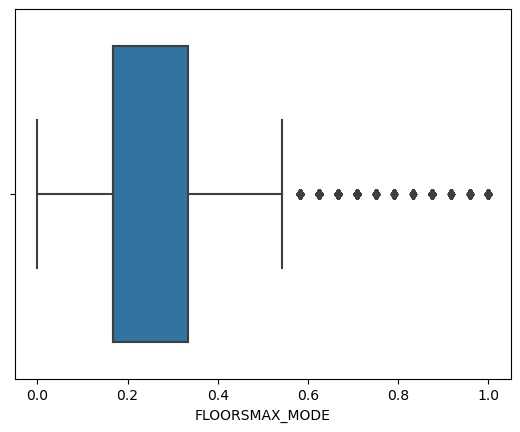

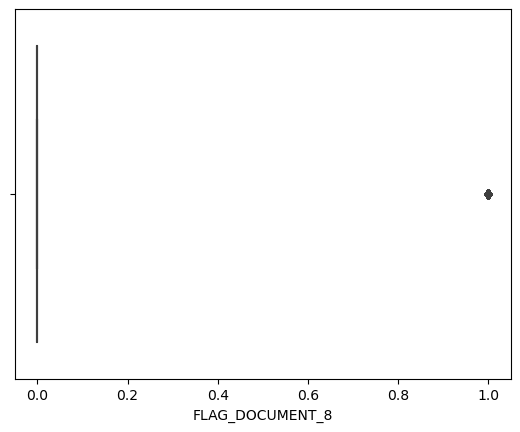

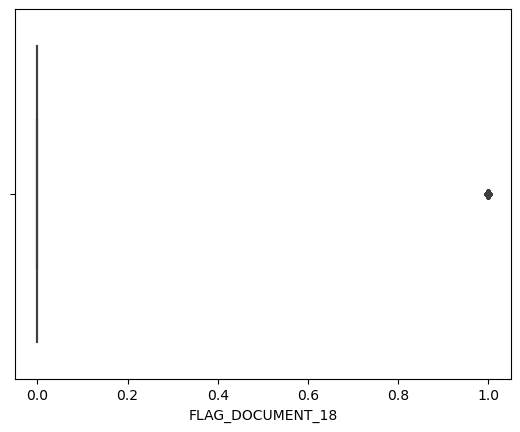

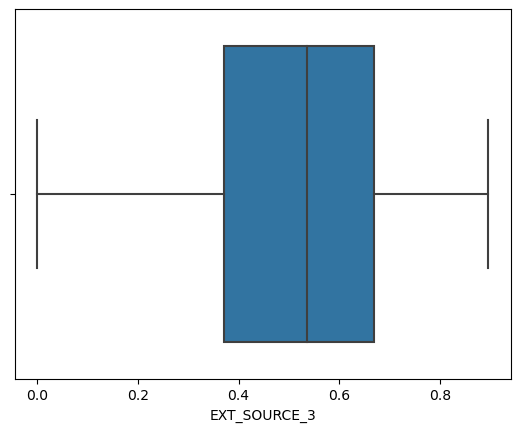

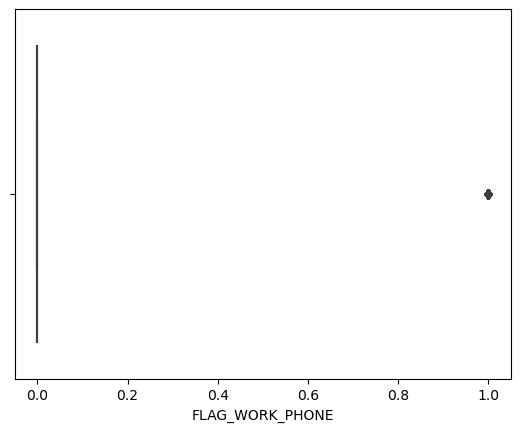

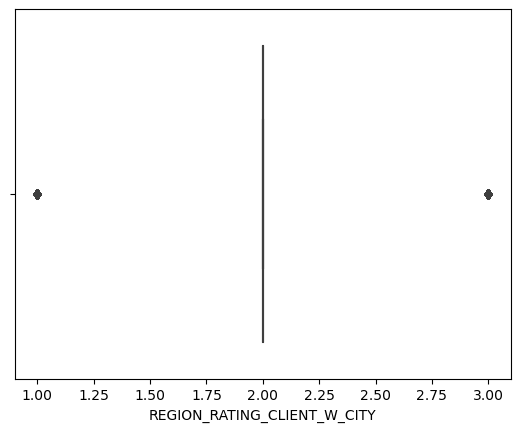

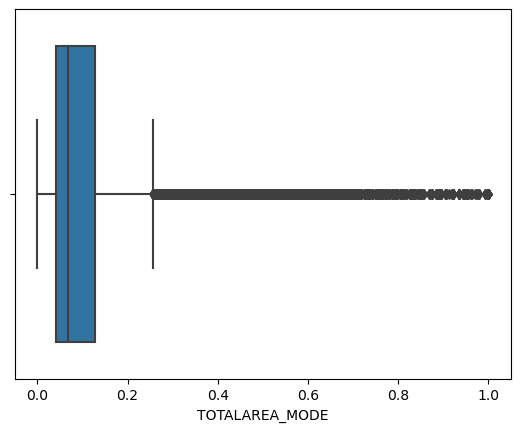

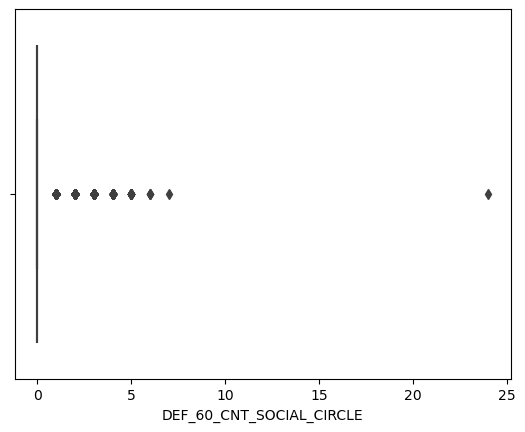

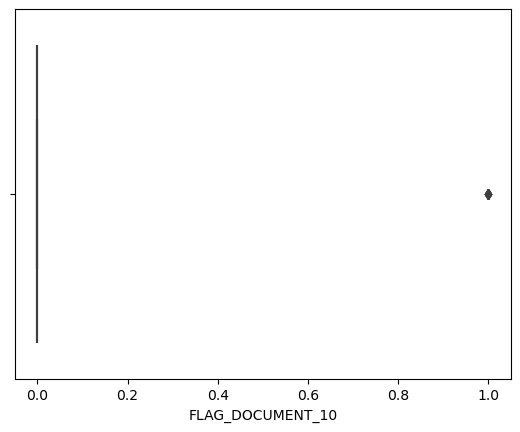

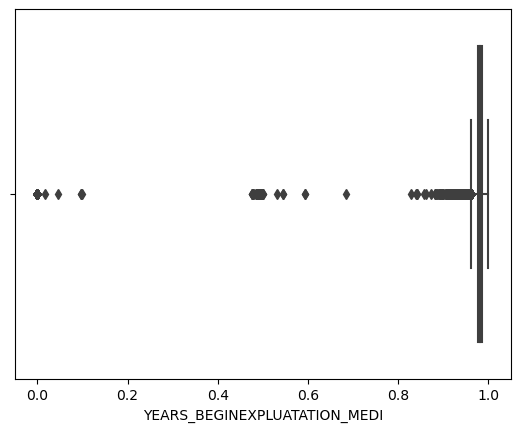

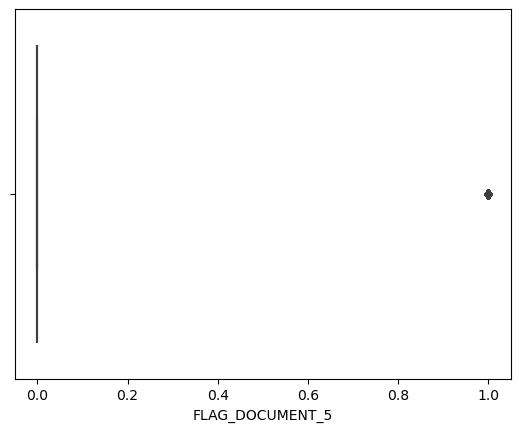

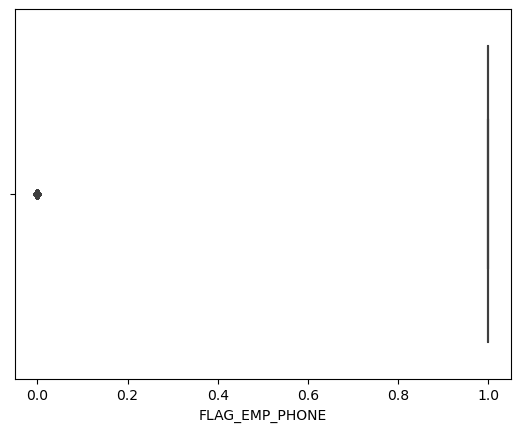

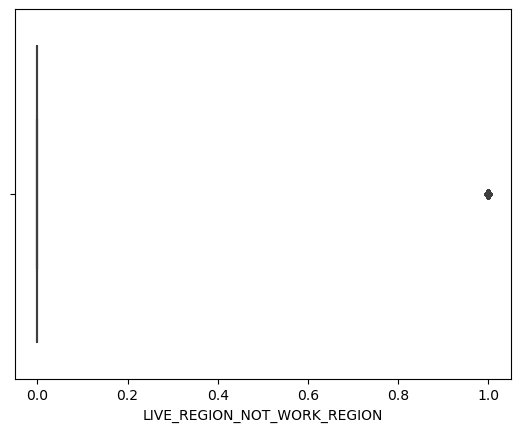

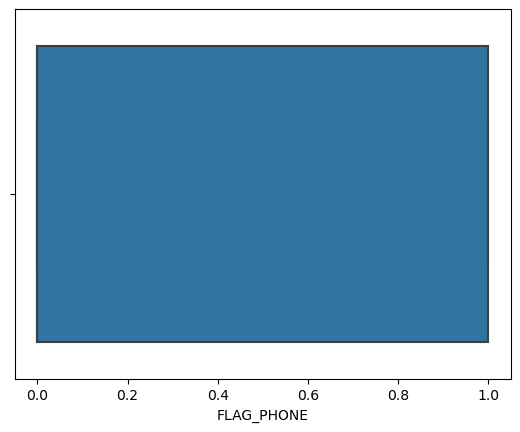

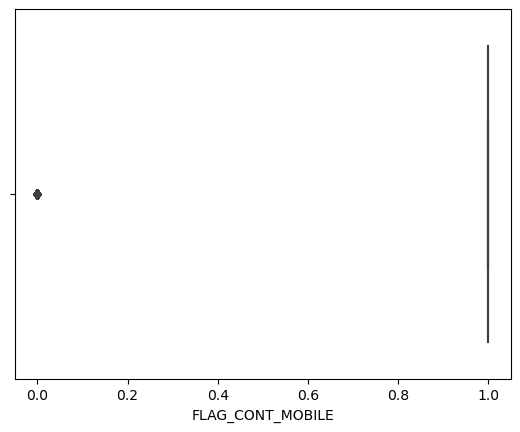

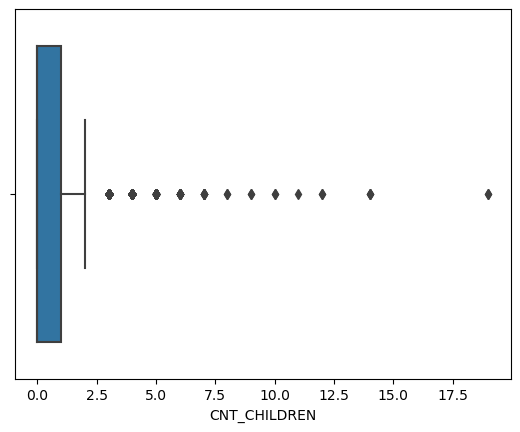

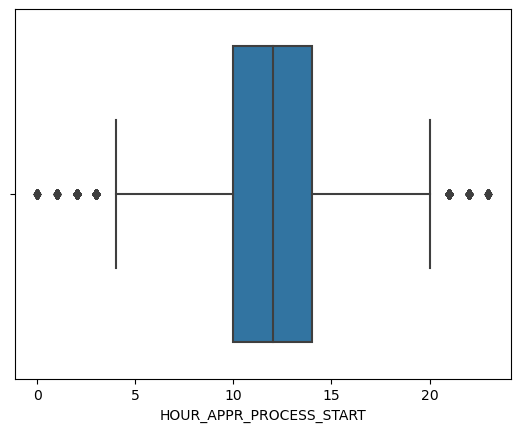

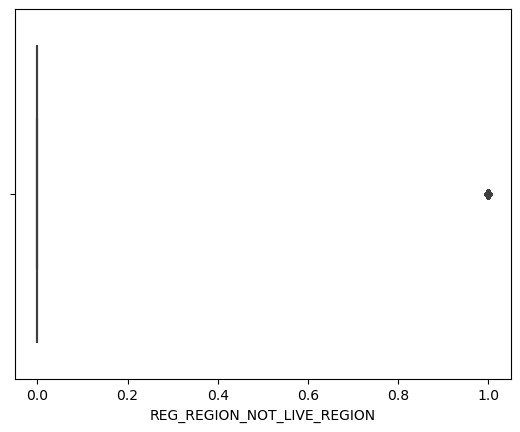

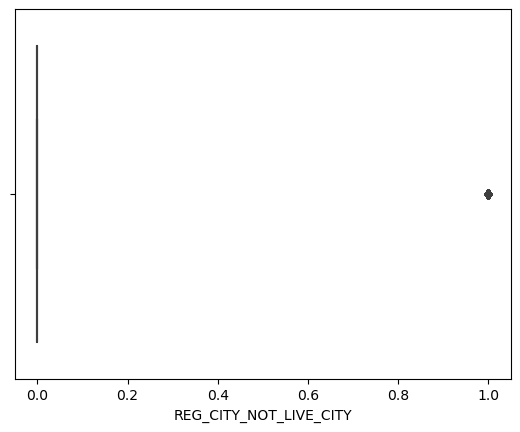

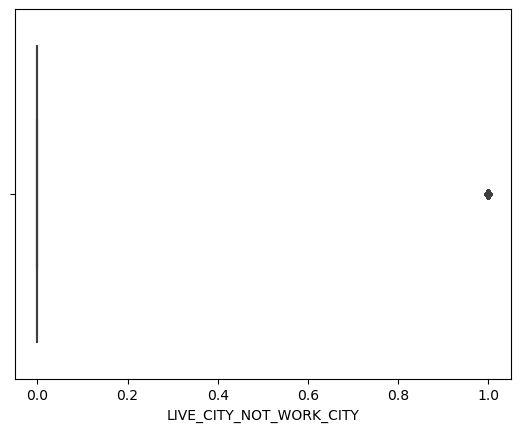

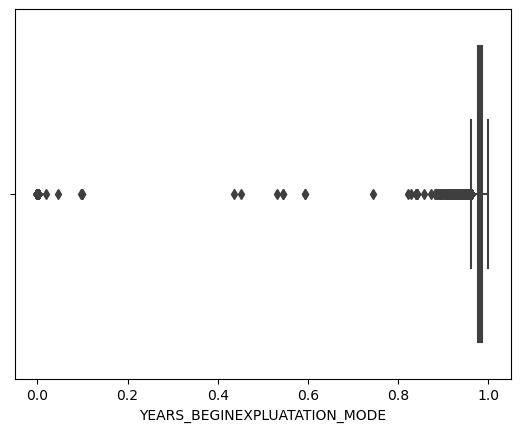

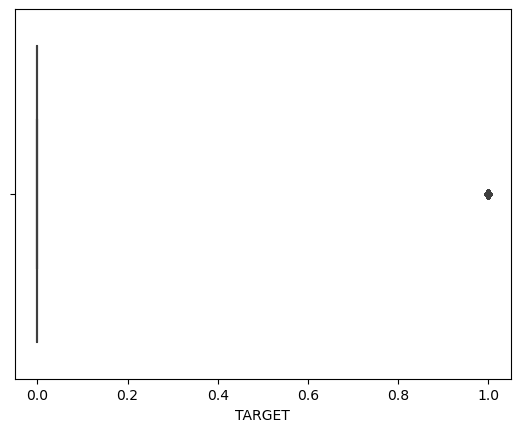

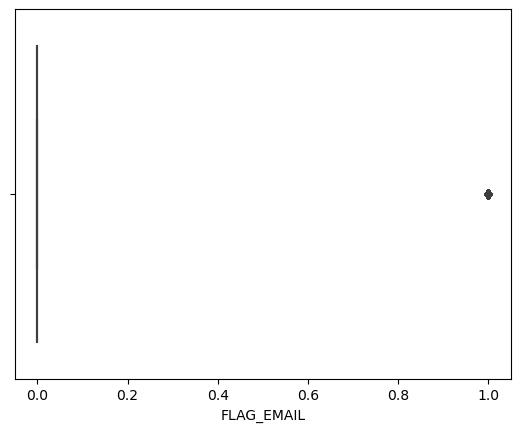

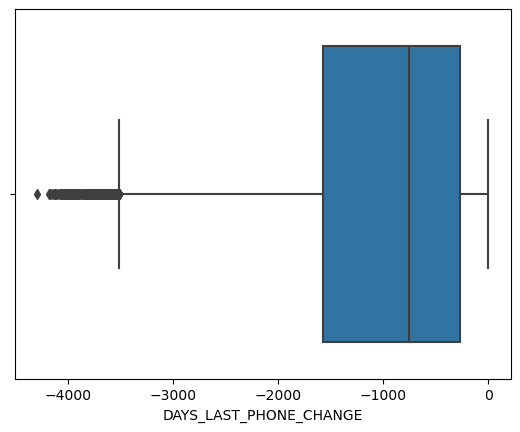

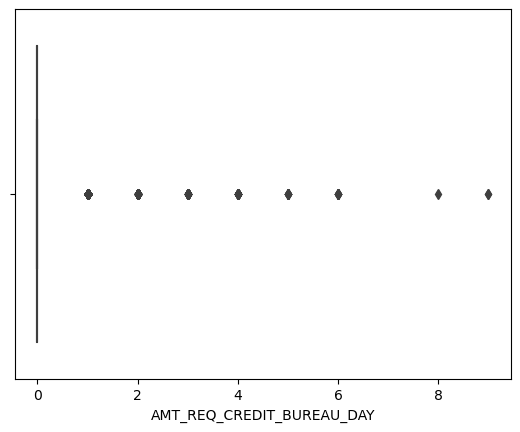

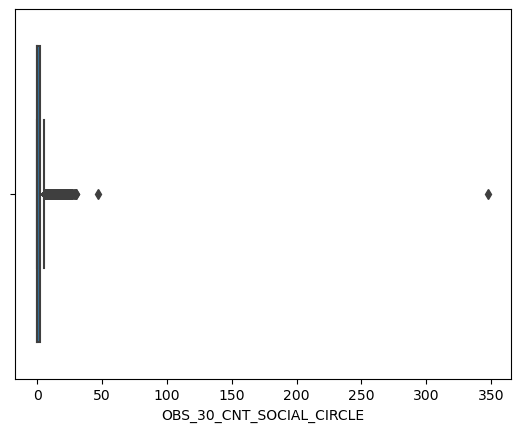

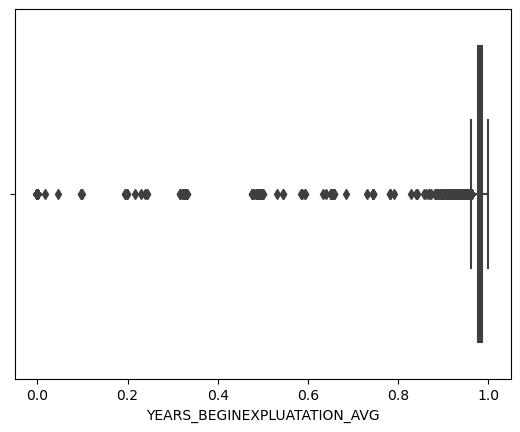

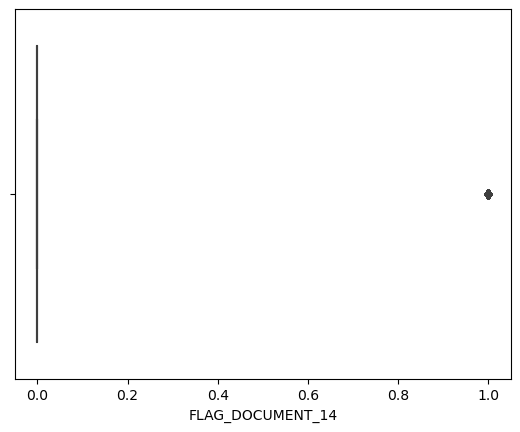

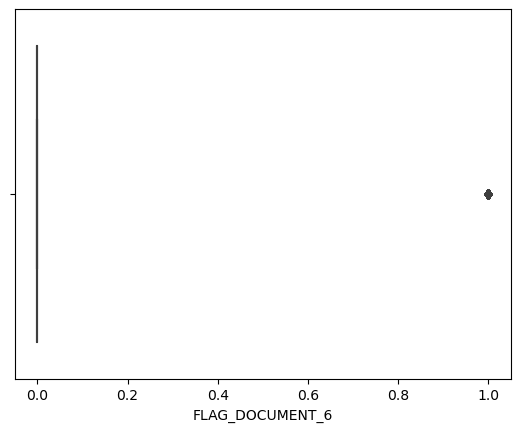

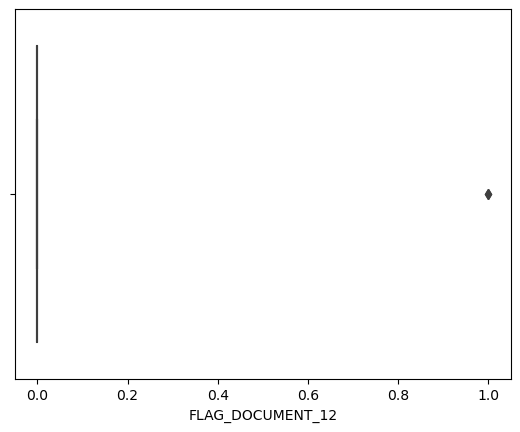

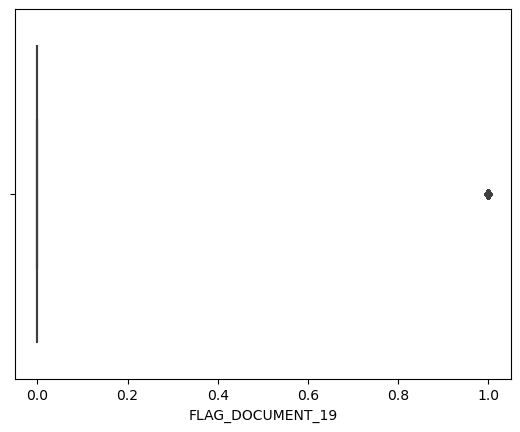

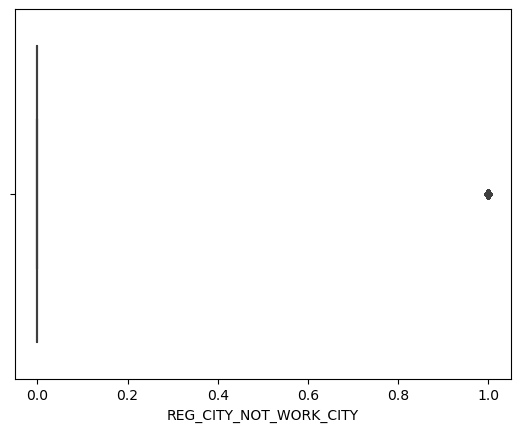

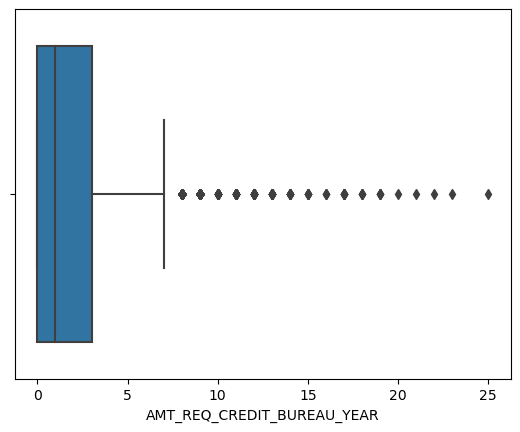

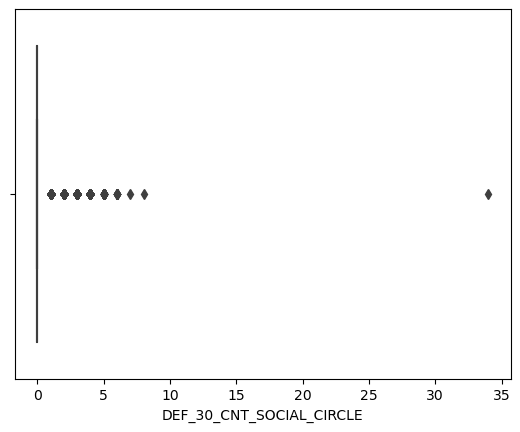

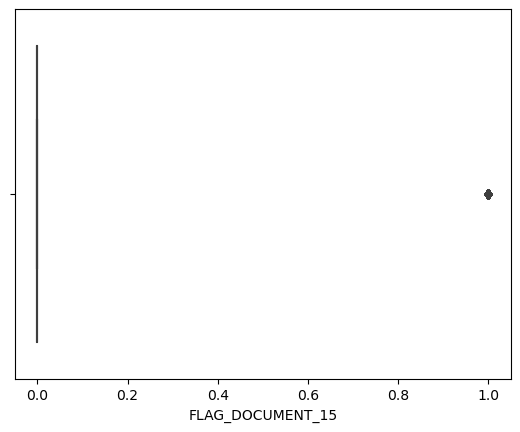

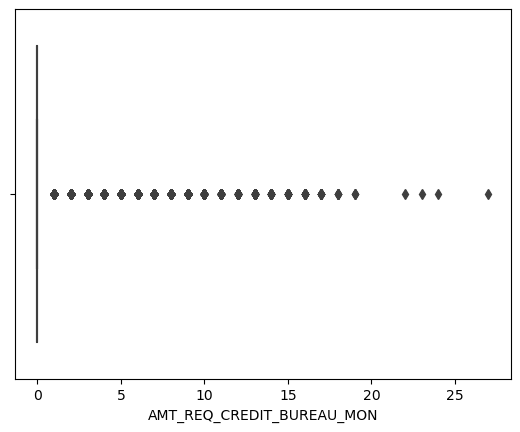

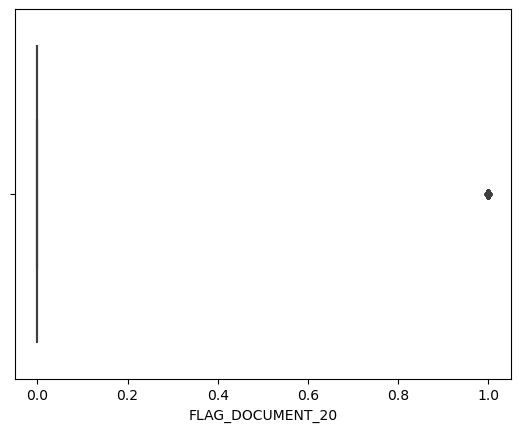

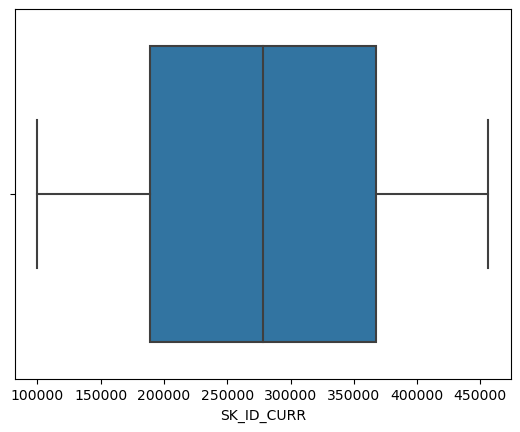

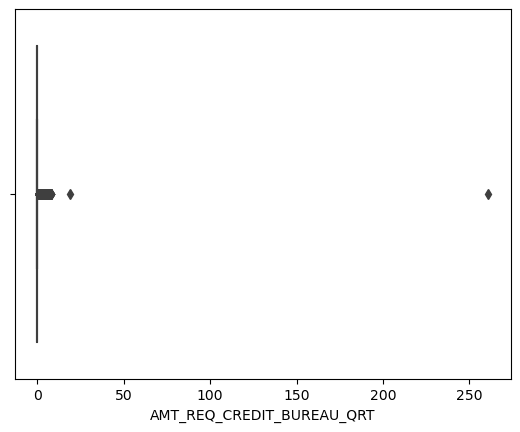

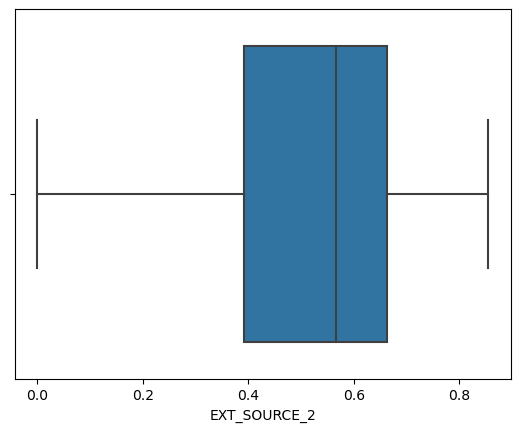

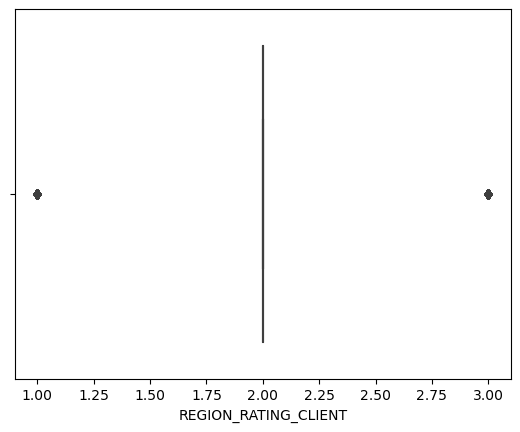

In [39]:
for i in numerical_Cols :
    sns.boxplot(x=df[i])
    plt.show()

- inference : ['AMT_INCOME_TOTAL','LIVE_CITY_NOT_WORK_CITY','DAYS_EMPLOYED','AMT_CREDIT','CNT_FAM_MEMBERS'] this is a small list where we can observe an outliers in the dataset.

### Treatment of outliers.

### Binning treatment

Binning can be done with numerical columns like "CNT_CHILDREN" to group values into particular ranges. 
This can be useful for simplifying the analysis and handling outliers in the dataset. 

In [40]:
# binning treatment on CNT_CHILDREN column by making 4 bins.
bins = [-1, 1, 5, 10, 15, 20]
labels = ['1st_bin','2nd_bin','3rd_bin','4th_bin','5th_bin']
df['CNT_CHILDREN_Binned'] = pd.cut(df['CNT_CHILDREN'], bins=bins, labels=labels)

In [41]:
df['CNT_CHILDREN_Binned'].head()

0    1st_bin
1    1st_bin
2    1st_bin
3    1st_bin
4    1st_bin
Name: CNT_CHILDREN_Binned, dtype: category
Categories (5, object): ['1st_bin' < '2nd_bin' < '3rd_bin' < '4th_bin' < '5th_bin']

In [42]:
# binning treatment on AMT_INCOME_TOTAL column by making 4 catagorised bins.

In [43]:
bins = [0, 50000, 70000, 100000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['AMT_INCOME_TOTAL_binned'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

In [44]:
df['AMT_INCOME_TOTAL_binned'].head()

0    Very High
1    Very High
2       Medium
3    Very High
4    Very High
Name: AMT_INCOME_TOTAL_binned, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [45]:
# binning treatment on DAYS_BIRTH column by making 5 catagorised bins.

In [46]:
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Teen', 'Young', 'Adult', 'Senior','Old_People']
df['DAYS_BIRTH_binned'] = pd.cut(df['DAYS_BIRTH'], bins=bins, labels=labels)

In [47]:
df['DAYS_BIRTH_binned'].head()

0         Young
1        Senior
2    Old_People
3    Old_People
4    Old_People
Name: DAYS_BIRTH_binned, dtype: category
Categories (5, object): ['Teen' < 'Young' < 'Adult' < 'Senior' < 'Old_People']

## Analysis

we have TARGET variable in the application dataset where it contains only two values 0 and 1. as per the given descriptive dataset
0 means applicants with no payment difficulties (i.e. non defaulter applicants) and
1 means applicants with payment difficulties (i.e. defaulter applicants)

In [48]:
#checking value_counts of TARGET column.
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [49]:
#checking imbalabe_percentages of TARGET column.
imbalabe_percent = df['TARGET'].value_counts(normalize=True) * 100

In [50]:
imbalabe_percent

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

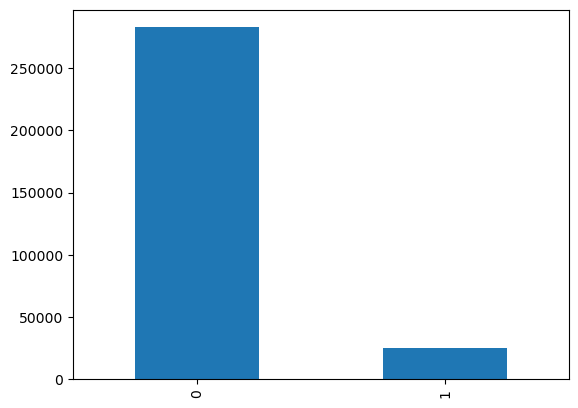

In [51]:
df.TARGET.value_counts().plot(kind='bar')
plt.show()

### Creating two sub dataframes TARGET_0 AND TARGET_1. 

Here is a Strategy to Analyse Data

we will Create two DataFrame from Master DataFrame

TARGET_0 = This dataFrame will contain only records of non defauler applicants

TARGET_1 = This dataFrame will contain only records of defauler applicants

after that,

we will compare the both types of applicants and find insights from the Data
using visualising verious types of plot.

In [52]:
# To create two sub dataframes from TARGET column we should filter the column as per the condition.
TARGET_0 = df[df['TARGET'] == 0]
TARGET_1 = df[df['TARGET'] == 1]

In [53]:
TARGET_0.TARGET.head()

1    0
2    0
3    0
4    0
5    0
Name: TARGET, dtype: int64

In [54]:
TARGET_1.TARGET.head()

0     1
26    1
40    1
42    1
81    1
Name: TARGET, dtype: int64

### Univeriate analysis of application dataset

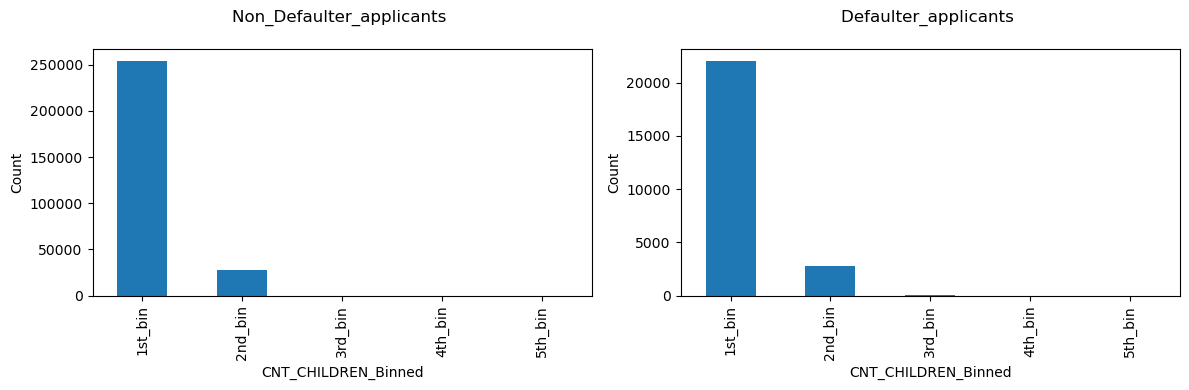

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

axes[0].set_title('Non_Defaulter_applicants \n')
TARGET_0['CNT_CHILDREN_Binned'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('CNT_CHILDREN_Binned')
axes[0].set_ylabel('Count')

axes[1].set_title('Defaulter_applicants \n')
TARGET_1['CNT_CHILDREN_Binned'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('CNT_CHILDREN_Binned')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

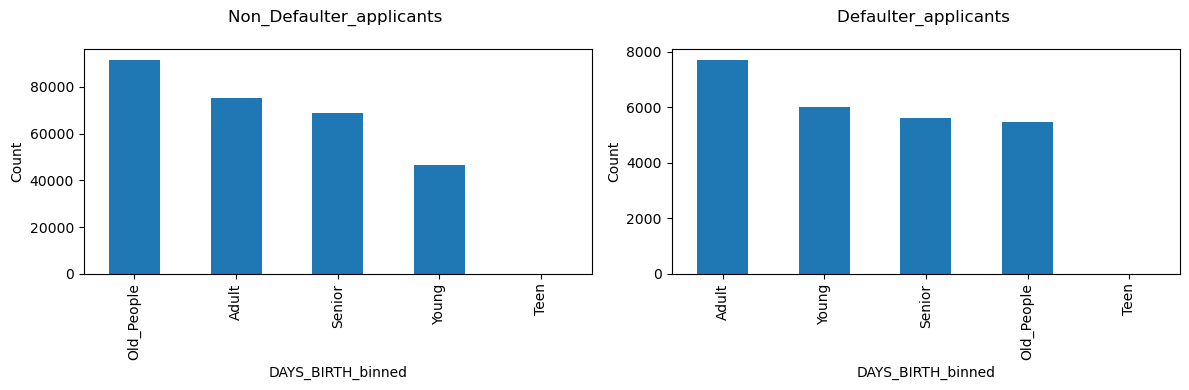

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns for two subplots

axes[0].set_title('Non_Defaulter_applicants \n')
TARGET_0['DAYS_BIRTH_binned'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('DAYS_BIRTH_binned')
axes[0].set_ylabel('Count')

axes[1].set_title('Defaulter_applicants \n')
TARGET_1['DAYS_BIRTH_binned'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('DAYS_BIRTH_binned')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

Inference : --from these subplots we can say that the old_People with age ranges above 50 are mostly non_defaulter applicants.
            --whereas Adult people age ranges between 30 to 40 are mostly belongs to defaulter applicants.

### Bivariate analysis / multiveriate analysis of application dataset

Biveriate analysis is the analitical process where we can observe and analyse the two variable in a same plot.

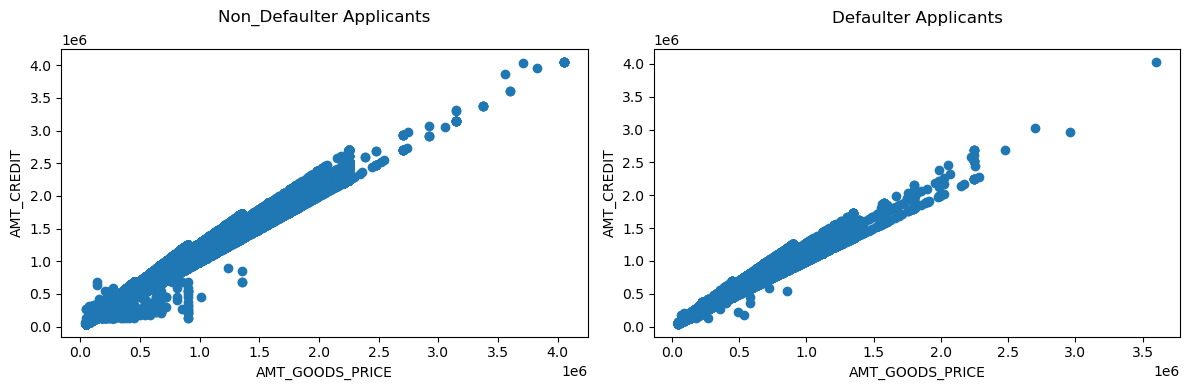

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns for two subplots

axes[0].set_title('Non_Defaulter Applicants\n')
axes[0].scatter(TARGET_0['AMT_GOODS_PRICE'], TARGET_0['AMT_CREDIT'])
axes[0].set_xlabel('AMT_GOODS_PRICE')
axes[0].set_ylabel('AMT_CREDIT')

axes[1].set_title('Defaulter Applicants\n')
axes[1].scatter(TARGET_1['AMT_GOODS_PRICE'], TARGET_1['AMT_CREDIT'])
axes[1].set_xlabel('AMT_GOODS_PRICE')
axes[1].set_ylabel('AMT_CREDIT')

plt.tight_layout()

plt.show()

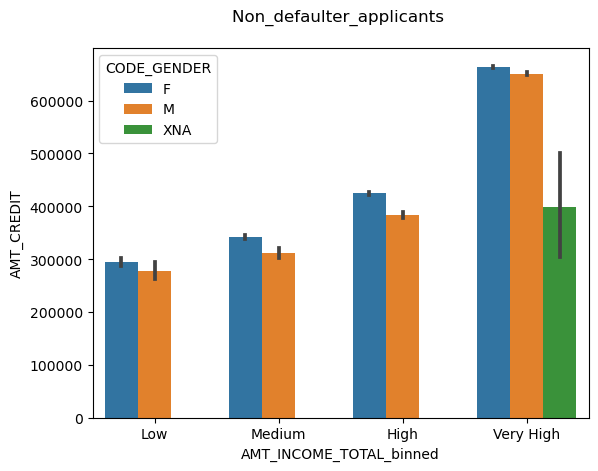

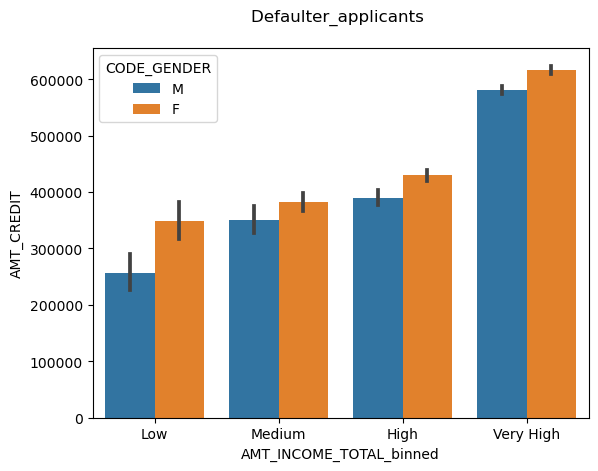

In [58]:
#Biveriate analysis of AMT_INCOME_TOTAL_binned and AMT_CREDIT with CODE_GENDER as hue.
sns.barplot(x="AMT_INCOME_TOTAL_binned", y="AMT_CREDIT", hue="CODE_GENDER", data=TARGET_0)
plt.title("Non_defaulter_applicants \n")
plt.show()

sns.barplot(x="AMT_INCOME_TOTAL_binned", y="AMT_CREDIT", hue="CODE_GENDER", data=TARGET_1)
plt.title("Defaulter_applicants \n")
plt.show()

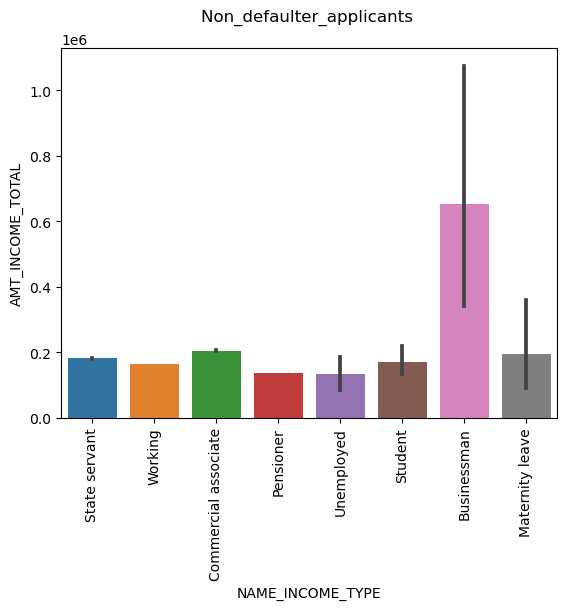

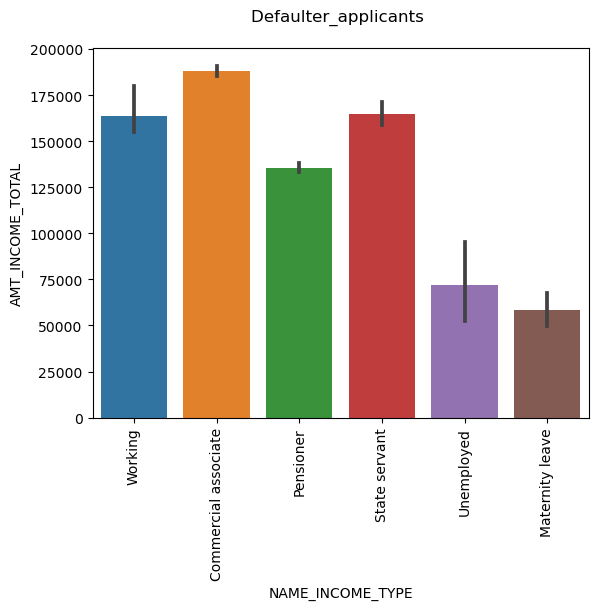

In [59]:
#Biveriate analysis of NAME_INCOME_TYPE and AMT_INCOME_TOTAL without hue.
sns.barplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=TARGET_0)
plt.title("Non_defaulter_applicants \n")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=TARGET_1)
plt.title("Defaulter_applicants \n")
plt.xticks(rotation=90)
plt.show()

Inference : --From the above barplot we can say that unknown males are having highest income range are mostly                                 non_defaulter_applicants.
            --On the other hand Married males are mostly Defaulter_applicants.
            --use of Hue in visualization plots can make easy to find insights from the data with respect to hue column.

### Correlation Matrix

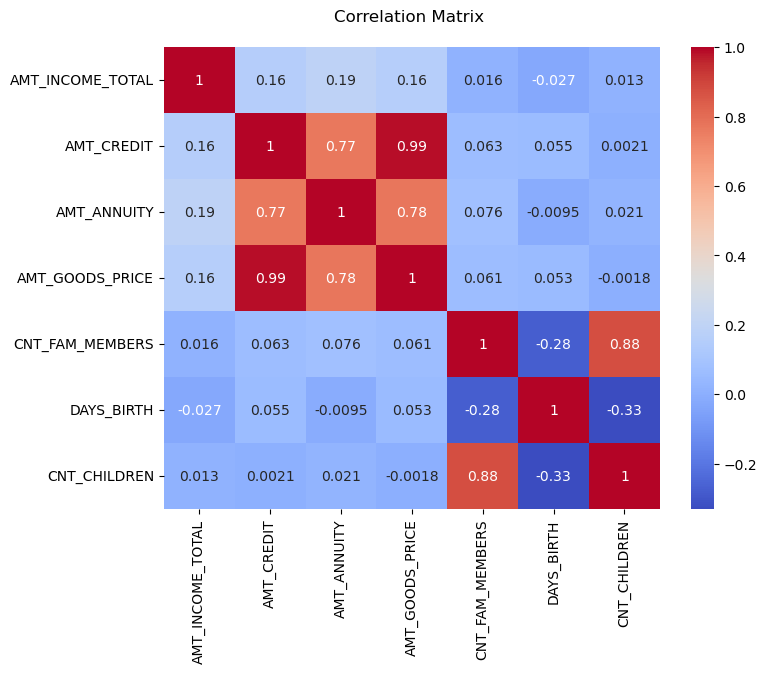

In [60]:
# to plot heatmap to show correlation matrix we have to select that columns which we want to analyse.
selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'CNT_CHILDREN']
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix \n")
plt.show()

### Reading previous application dataset3

In [61]:
df1 = pd.read_csv("C:\\Users\\OWNER\\Downloads\\previous_application.csv")

In [62]:
pd.set_option("display.max_columns",None)

In [63]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df1.shape

(1670214, 37)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [66]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.435968,185.021521,13.168683,7.713474,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.954593,381.972190,9.646841,4.134515,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [67]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [68]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### checking null_values in df

In [69]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### checking percentage of null_values in df

In [70]:
null_percent_of_df1 = df1.isnull().sum()/len(df1)*100

In [71]:
null_percent_of_df1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### droping columns which have more than 50% null_values

In [72]:
# checking and creating a list of columns with more than 50% null_values as they are not that much usefull.
col_to_drop = list(df1.columns[df1.isnull().sum()/len(df1)*100 > 50])

In [73]:
col_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [74]:
#droping the columns which has more than 50% null_values using drop() function.
df1 = df1.drop(col_to_drop,axis=1)

In [75]:
df1.shape

(1670214, 33)

### finding 5 columns which are having null_value percentage < 13%

In [76]:
top_5_cols = null_percent_of_df1[null_percent_of_df1<13]

In [77]:
top_5_cols.head()

SK_ID_PREV            0.00000
SK_ID_CURR            0.00000
NAME_CONTRACT_TYPE    0.00000
AMT_APPLICATION       0.00000
AMT_CREDIT            0.00006
dtype: float64

### Description of imputation of null_values.

### checking datatype of each columns in df1

In [78]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP         

In [79]:
df1.dtypes.value_counts()

object     16
float64    11
int64       6
dtype: int64

### Treating anomalies of datatypes in df

In [80]:
# DAYS_REGISTRATION column has negative values we need to convert the values into positive integer by abs() function.
# DAYS_REGISTRATION column is in days format it need to coverted into years format by dividing the column by 365. 

In [81]:
df1['DAYS_DECISION'].abs()/365

0          0.200000
1          0.449315
2          0.824658
3          1.402740
4          2.139726
             ...   
1670209    1.490411
1670210    4.641096
1670211    4.076712
1670212    3.246575
1670213    3.268493
Name: DAYS_DECISION, Length: 1670214, dtype: float64

In [82]:
df1['SELLERPLACE_AREA'].abs()/365

0          0.095890
1          0.002740
2          0.002740
3          0.002740
4          0.002740
             ...   
1670209    0.117808
1670210    0.117808
1670211    3.753425
1670212    0.002740
1670213    0.002740
Name: SELLERPLACE_AREA, Length: 1670214, dtype: float64

In [83]:
df1['DAYS_FIRST_DUE'].abs()/365

0          0.115068
1          0.367123
2          0.742466
3          1.320548
4               NaN
             ...   
1670209    1.391781
1670210    4.394521
1670211    3.991781
1670212    3.164384
1670213    3.186301
Name: DAYS_FIRST_DUE, Length: 1670214, dtype: float64

In [84]:
df1['DAYS_LAST_DUE_1ST_VERSION'].abs()/365

0          0.821918
1          2.509589
2          0.161644
3          0.416438
4               NaN
             ...   
1670209    0.991781
1670210    3.490411
1670211    3.252055
1670212    2.260274
1670213    0.676712
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 1670214, dtype: float64

In [85]:
df1['DAYS_TERMINATION'].abs()/365

0             0.101370
1          1000.665753
2          1000.665753
3             0.484932
4                  NaN
              ...     
1670209       0.961644
1670210       3.553425
1670211       3.235616
1670212       2.238356
1670213       1.158904
Name: DAYS_TERMINATION, Length: 1670214, dtype: float64

### Differentiating catagorical columns and numerical columns.

In [86]:
num_Cols = df1.select_dtypes("number").columns
cat_Cols = df1.select_dtypes("object").columns
num_Cols= list(set(num_Cols))
cat_Cols= list(set(cat_Cols))

In [87]:
num_Cols

['SK_ID_PREV',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'CNT_PAYMENT',
 'DAYS_FIRST_DUE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_LAST_DUE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'DAYS_TERMINATION',
 'AMT_APPLICATION',
 'SK_ID_CURR',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DRAWING']

In [88]:
cat_Cols

['CHANNEL_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'CODE_REJECT_REASON',
 'NAME_CONTRACT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_GOODS_CATEGORY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'PRODUCT_COMBINATION',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

### Identification of outliers

In [89]:
# To identify presence of outliers in different columns we can visualize the respective columns by using boxplot, scatterplot,
# or IQR method.

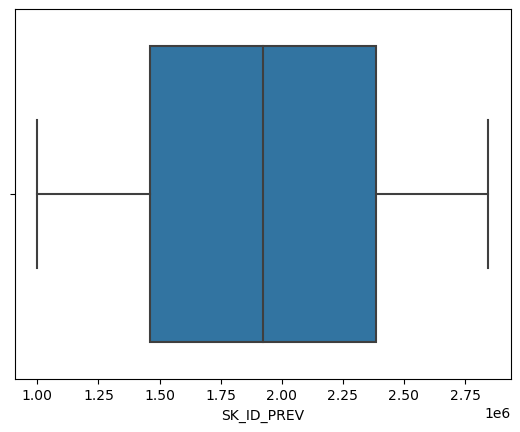

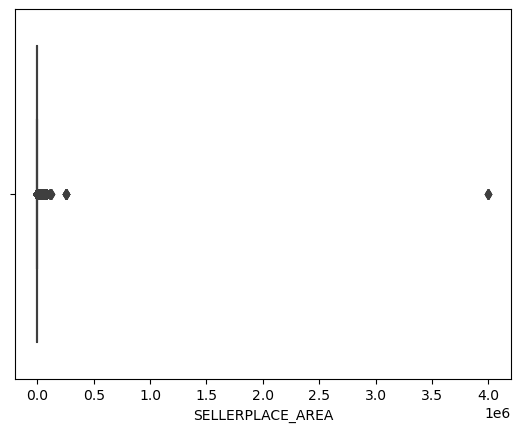

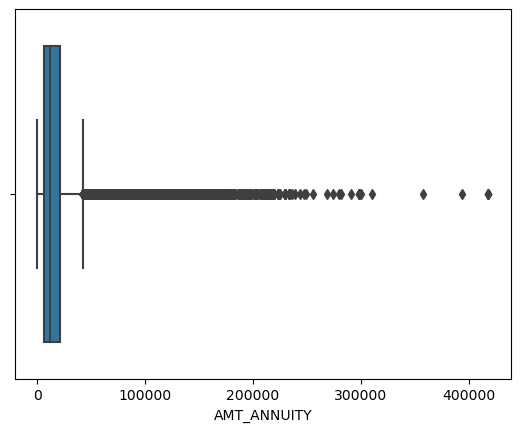

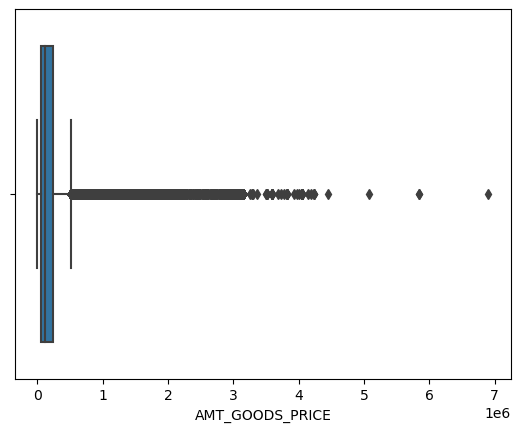

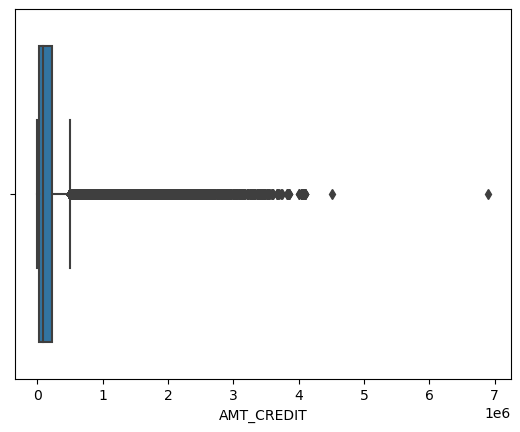

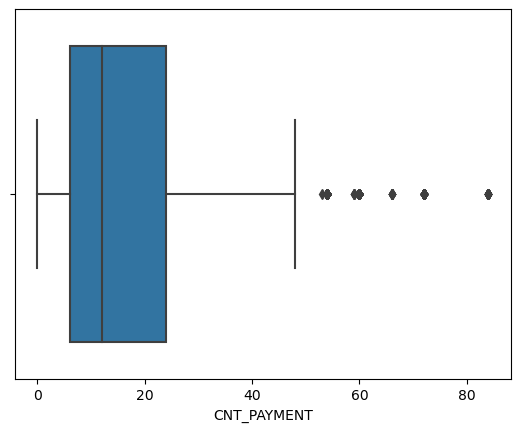

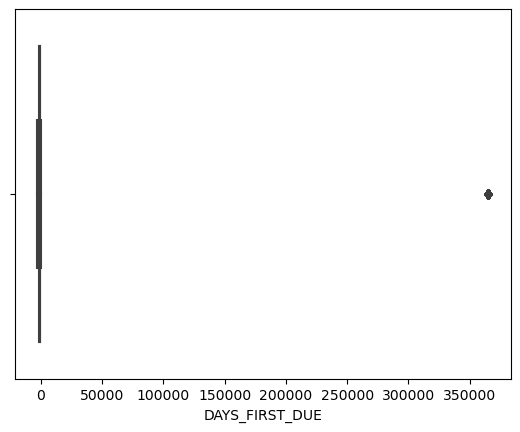

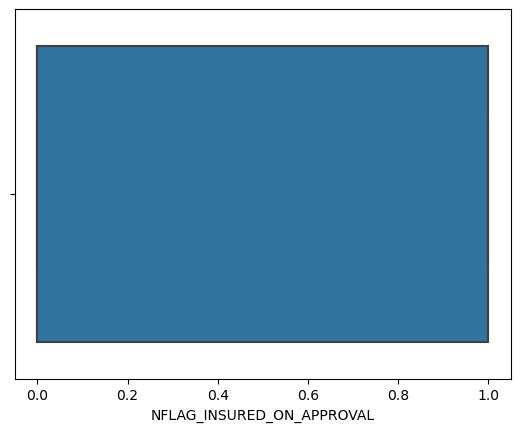

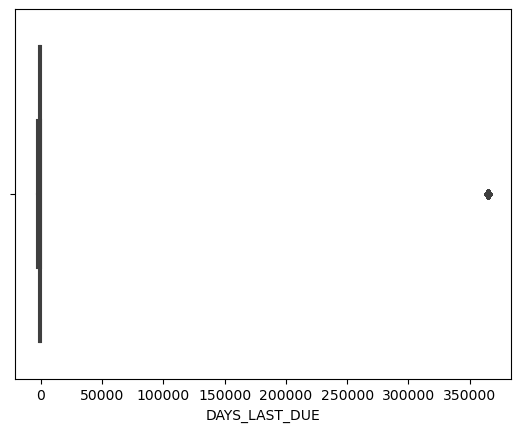

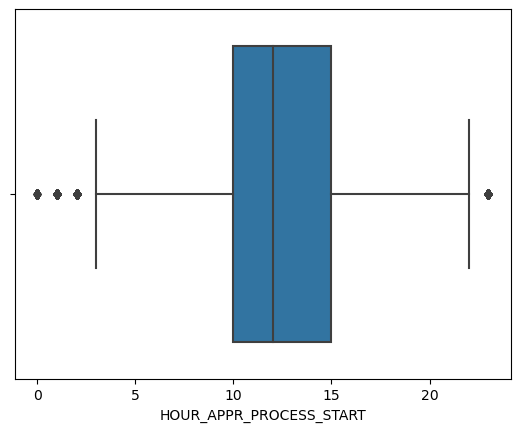

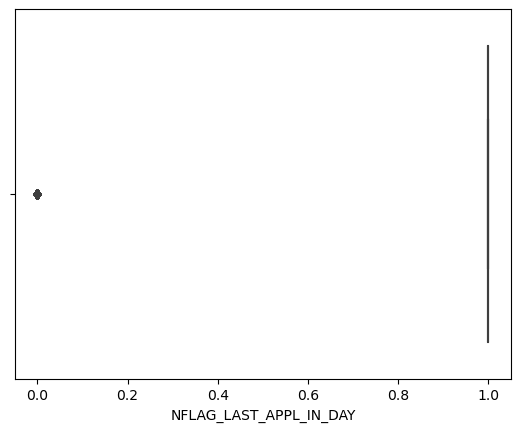

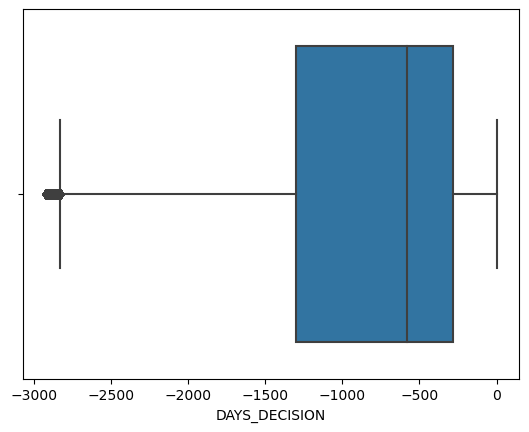

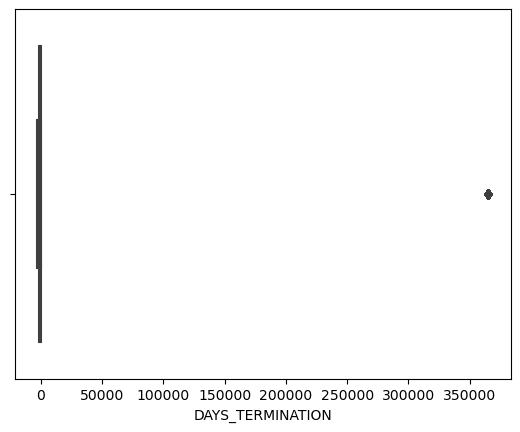

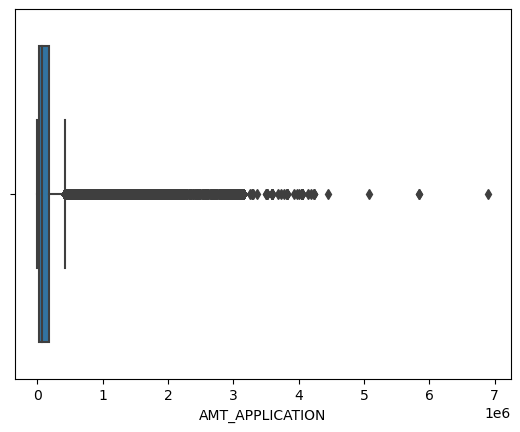

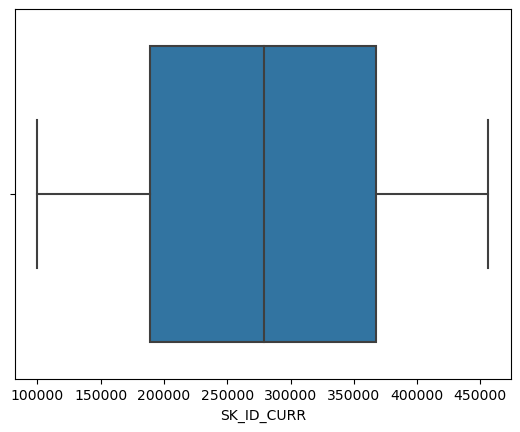

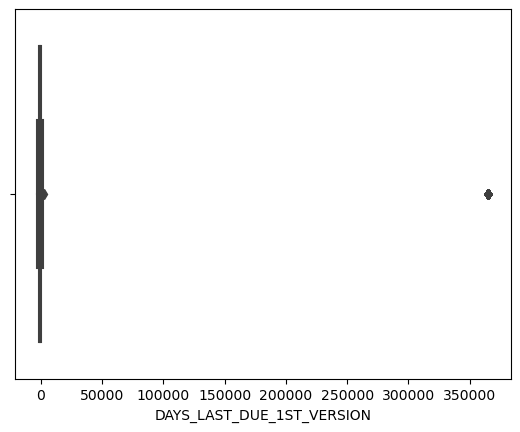

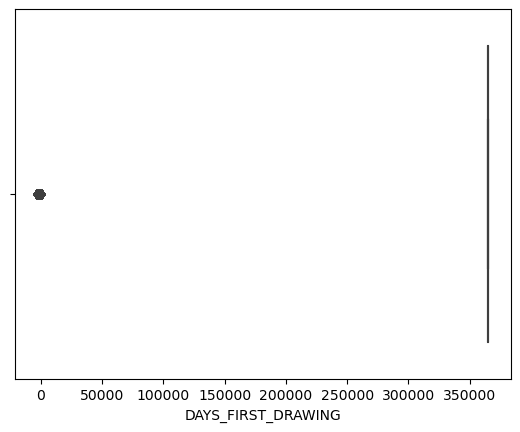

In [90]:
for i in num_Cols :
    sns.boxplot(x=df1[i])
    plt.show()

### Binning Treatment

In [91]:
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['1','2','3','4','5','6']
df1['AMT_CREDIT_binned'] = pd.cut(df1['AMT_CREDIT'], bins=bins, labels=labels)

In [92]:
df1['AMT_CREDIT_binned'].head()

0    1
1    6
2    2
3    5
4    5
Name: AMT_CREDIT_binned, dtype: category
Categories (6, object): ['1' < '2' < '3' < '4' < '5' < '6']

### Univeriate Analysis of previous application dataset

<Figure size 800x600 with 0 Axes>

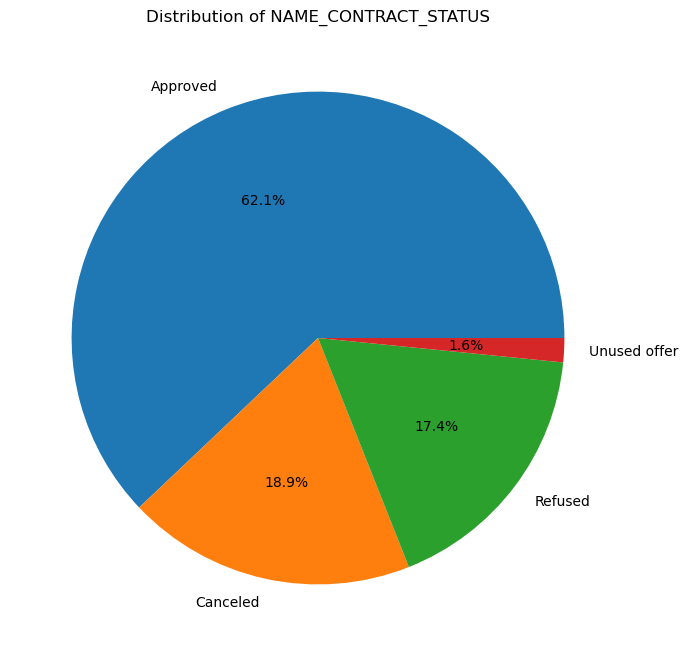

In [93]:
# univeriate analysis of catagorical column. 
# as df1['NAME_CONTRACT_STATUS'] is a catagorical column we can visualise it with the help of pie chart.
plt.figure(figsize=(8, 6))
contract_status = df1['NAME_CONTRACT_STATUS'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contract_status, labels=contract_status.index, autopct='%1.1f%%')
plt.title("Distribution of NAME_CONTRACT_STATUS")
plt.show()

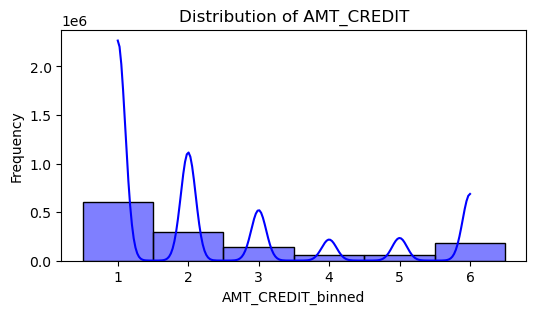

In [94]:
# if there are both the columns are numerical then we can visualise then with the help of scatterplot, pairplot etc.
# as df1['AMT_CREDIT'] is a numerical columns we will visualise it with the help of histplot.
plt.figure(figsize=(6, 3))
sns.histplot(x=df1['AMT_CREDIT_binned'], kde=True, color='blue')
plt.title("Distribution of AMT_CREDIT")
plt.xlabel("AMT_CREDIT_binned")
plt.ylabel("Frequency")
plt.show()

In [95]:
#merge two datasets 
merged_df = pd.merge(df, df1, on='SK_ID_CURR', how='inner')

In [96]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_Binned,AMT_INCOME_TOTAL_binned,DAYS_BIRTH_binned,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_binned
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1st_bin,Very High,Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1st_bin,Very High,Senior,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,6
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1st_bin,Very High,Senior,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the b

In [97]:
merged_df.shape

(1413701, 117)

In [98]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 117 entries, SK_ID_CURR to AMT_CREDIT_binned
dtypes: category(4), float64(38), int64(46), object(29)
memory usage: 1.2+ GB


In [99]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,729019.000000,715193.000000,729019.000000,715193.000000,729019.000000,715193.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,4.421384e+01,1.985500e+02,1.321683e+01,7.823753e+00,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114275e-01,4.896986e-01,0.977235,0.222317,0.976515,0.218556,0.977220,0.221945,0.099922,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,1.190217e+01,3.926378e+02,9.725399e+00,4.129233e+00,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,4.957797e-01,4.886431

In [100]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'AMT_CREDIT_binned'],
      dtype='object', length=117)

In [101]:
merged_df.dtypes.value_counts()

int64       46
float64     38
object      29
category     1
category     1
category     1
category     1
dtype: int64

### Univeriate analysis of merged dataset

<Figure size 600x300 with 0 Axes>

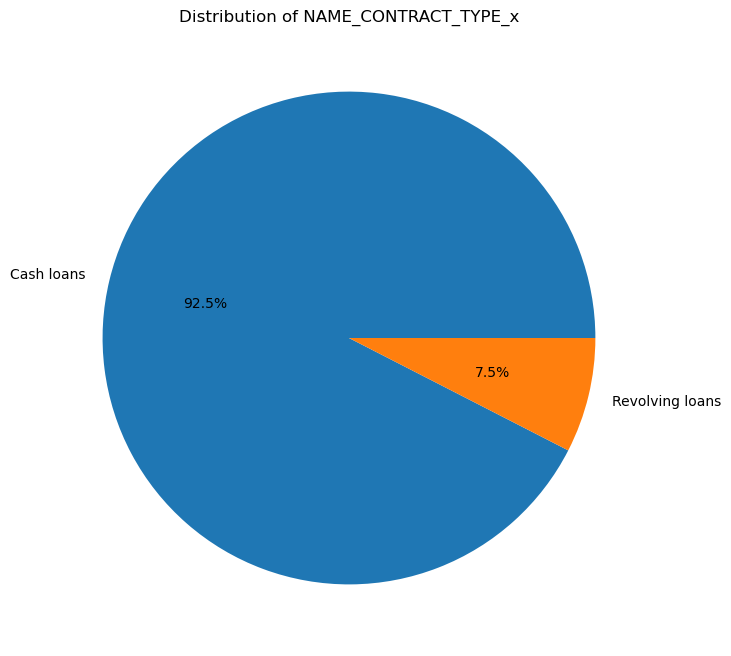

In [102]:
# univeriate analysis of catagorical column. 
#df1['NAME_CONTRACT_STATUS'] is a catagorical column so we can visualise it with the help of pie chart.
plt.figure(figsize=(6, 3))
CONTRACT_TYPE = merged_df['NAME_CONTRACT_TYPE_x'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(CONTRACT_TYPE, labels=CONTRACT_TYPE.index, autopct='%1.1f%%')
plt.title("Distribution of NAME_CONTRACT_TYPE_x")
plt.show()

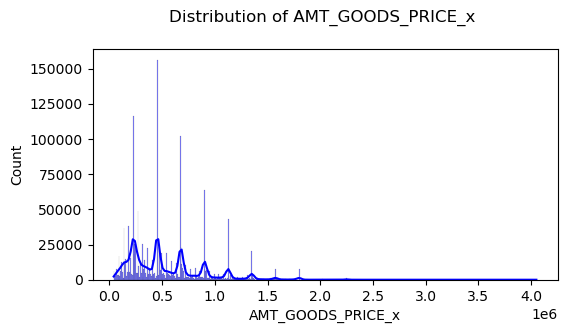

In [103]:
# here we can do univeriate analysis on goods_price column with the help of hist plot.
plt.figure(figsize=(6, 3))
sns.histplot(data=merged_df, x='AMT_GOODS_PRICE_x', kde=True, color='blue')
plt.title("Distribution of AMT_GOODS_PRICE_x \n")
plt.xlabel("AMT_GOODS_PRICE_x")
plt.ylabel("Count")
plt.show()

### Biveriate / multiveriate analysis of merged dataset

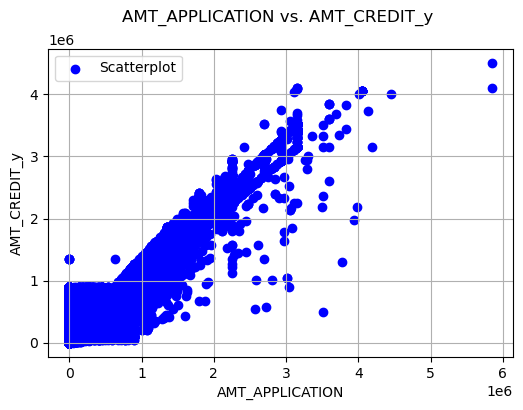

In [104]:
# if there are both the columns are numerical then we can visualise then with the help of scatterplot, pairplot etc.
# here we will use scatterplot to study correlation between application amount and credit amount.
plt.figure(figsize=(6, 4))
plt.scatter(merged_df['AMT_APPLICATION'], merged_df['AMT_CREDIT_y'], c='blue', marker='o', label='Scatterplot')
plt.title('AMT_APPLICATION vs. AMT_CREDIT_y \n')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_CREDIT_y')
plt.legend()
plt.grid(True)
plt.show()

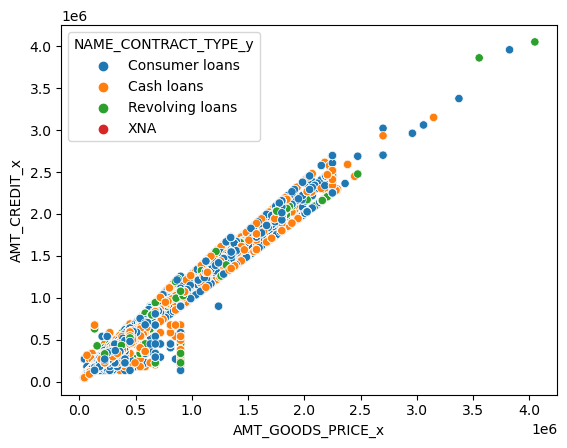

In [105]:
#scatterplot to show the count study of contract types of loans with goods price and credit amount columns. 
sns.scatterplot(x=merged_df['AMT_GOODS_PRICE_x'],y=merged_df['AMT_CREDIT_x'],hue=merged_df['NAME_CONTRACT_TYPE_y'])
plt.show()

### Correlation Matrix in merged dataset

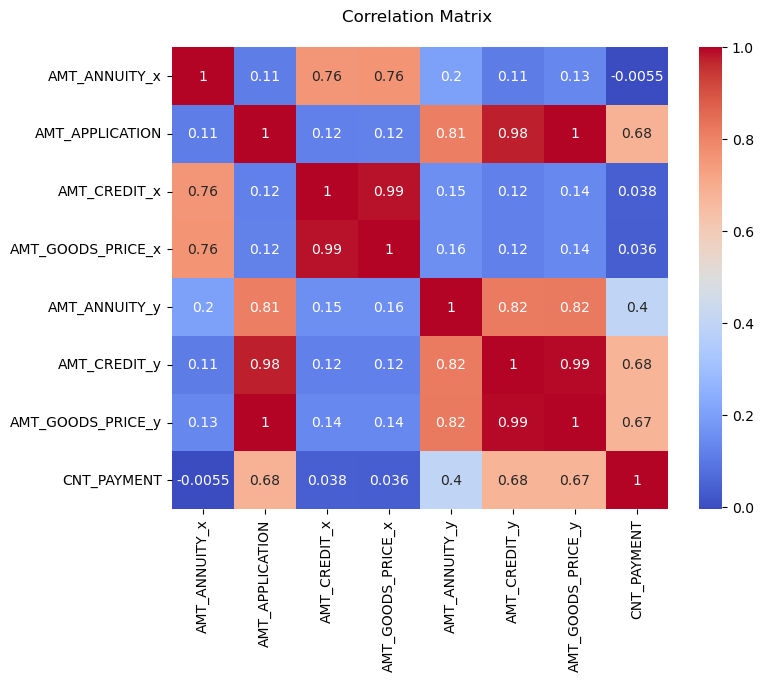

In [106]:
# to plot heatmap to show correlation matrix we have to select that columns which we want to analyse.
selected_columns = ['AMT_ANNUITY_x', 'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 
                    'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y','CNT_PAYMENT']
corr_df = merged_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix \n")
plt.show()